In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import random
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/mergeVincesnoAtipicos.csv"
_data = pd.read_csv(path, sep=';', low_memory=False)

Mounted at /content/drive


In [3]:
path = "/content/datos_prueba.csv"
_dataPrueba = pd.read_csv(path, sep=';', low_memory=False)

In [4]:
_data

,Index,_1,Identificador,year,rc_clacul,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,...,pq_herb,ct_color_her_pq,pq_ins,ct_color_ins_pq,pq_fun,ct_color_fun_pq,su_plaguicidas,ct_prod,Ventas,Unnamed: 28
0,168,12678,12085002062560003,2018,507,1,0.0706,0.0706,2,1,...,0.5,4,0.5,1,0.5,4,0.0706,0.272727,0.181818,NaN
1,172,12683,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
2,171,12682,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
3,170,12681,12085002062560004,2018,507,1,0.5000,0.5000,2,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
4,169,12680,12085002062560004,2018,507,1,0.5000,0.5000,3,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,163,16815,12085151000993398,2017,507,2,4.9392,4.9392,7,2,...,7.0,3,2.0,4,0.0,0,4.9392,16.838182,16.838182,NaN
475,162,16813,12085151000993398,2017,507,2,9.8784,9.8784,7,2,...,14.0,3,4.0,3,0.0,0,9.8784,33.676364,33.676364,NaN
476,167,16821,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN
477,166,16820,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN


In [5]:
data = _data[['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                       'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                       'ct_pqui', 'su_plaguicidas','Ventas']]

In [6]:
data

,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,su_fertilizada,ct_fqui,ct_fqui_npk,ct_pqui,su_plaguicidas,Ventas
0,1,0.0706,0.0706,2,1,0.0706,1,1.1023,1,0.0706,0.181818
1,1,0.5000,0.5000,2,1,0.5000,1,2.2046,1,0.5000,1.818182
2,1,0.5000,0.5000,2,1,0.5000,1,2.2046,1,0.5000,1.818182
3,1,0.5000,0.5000,2,2,0.5000,1,2.2046,1,0.5000,1.818182
4,1,0.5000,0.5000,3,2,0.5000,1,2.2046,1,0.5000,1.818182
...,...,...,...,...,...,...,...,...,...,...,...
474,2,4.9392,4.9392,7,2,4.9392,1,0.0000,1,4.9392,16.838182
475,2,9.8784,9.8784,7,2,9.8784,1,0.0000,1,9.8784,33.676364
476,1,5.0000,5.0000,7,1,5.0000,1,2204.6000,1,5.0000,11.697955
477,1,5.0000,5.0000,7,1,5.0000,1,2204.6000,1,5.0000,11.697955


In [9]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
# Convierte los datos escalados en un DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=data.columns)

In [8]:
df_scaled

,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,su_fertilizada,ct_fqui,ct_fqui_npk,ct_pqui,su_plaguicidas,Ventas
0,-0.748506,-0.983053,-0.954231,-0.832214,-1.323961,-0.943623,-0.272013,-0.604840,-0.363851,-0.878048,-0.800223
1,-0.748506,-0.728384,-0.700103,-0.832214,-1.323961,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223
2,-0.748506,-0.728384,-0.700103,-0.832214,-1.323961,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223
3,-0.748506,-0.728384,-0.700103,-0.832214,0.755309,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223
4,-0.748506,-0.728384,-0.700103,-0.341290,0.755309,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223
...,...,...,...,...,...,...,...,...,...,...,...
474,1.335995,1.904420,1.927117,1.622407,0.755309,2.036495,-0.272013,-0.606623,-0.363851,2.144463,2.263621
475,1.335995,4.833766,4.850248,1.622407,0.755309,5.059828,-0.272013,-0.606623,-0.363851,5.210805,5.360910
476,-0.748506,1.940480,1.963100,1.622407,-1.323961,2.073711,-0.272013,2.959613,-0.363851,2.182209,1.318105
477,-0.748506,1.940480,1.963100,1.622407,-1.323961,2.073711,-0.272013,2.959613,-0.363851,2.182209,1.318105


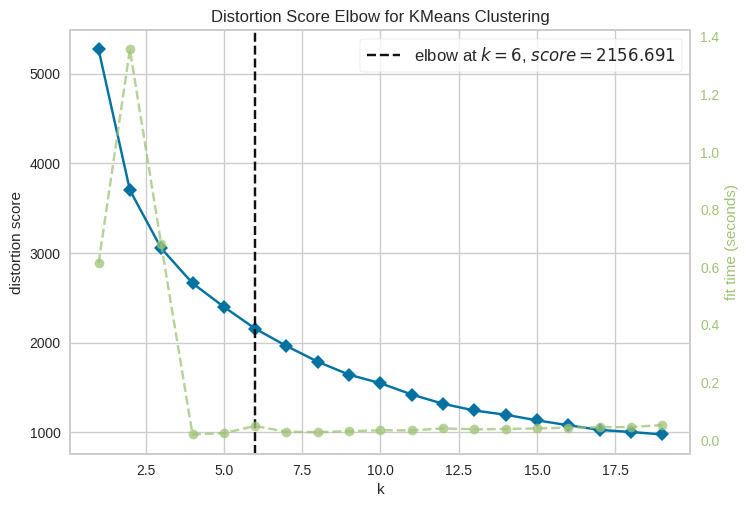

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Instantiate the KMeans model
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42,n_init=10)

# Instantiate the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 20))

# Fit the visualizer to the scaled data
visualizer.fit(X_scaled)

# Render the elbow curve
visualizer.show()

In [11]:
clustering_kmeans = KMeans(n_clusters=6, random_state=42,n_init=10)
df_scaled['clusters'] = clustering_kmeans.fit_predict(df_scaled)
#centroides = clustering_kmeans.cluster_centers_

In [12]:
n_features = clustering_kmeans.n_features_in_
print(n_features)

11


In [13]:
df_scaled

,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,su_fertilizada,ct_fqui,ct_fqui_npk,ct_pqui,su_plaguicidas,Ventas,clusters
0,-0.748506,-0.983053,-0.954231,-0.832214,-1.323961,-0.943623,-0.272013,-0.604840,-0.363851,-0.878048,-0.800223,3
1,-0.748506,-0.728384,-0.700103,-0.832214,-1.323961,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223,3
2,-0.748506,-0.728384,-0.700103,-0.832214,-1.323961,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223,3
3,-0.748506,-0.728384,-0.700103,-0.832214,0.755309,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223,5
4,-0.748506,-0.728384,-0.700103,-0.341290,0.755309,-0.680783,-0.272013,-0.603057,-0.363851,-0.611469,-0.499223,5
...,...,...,...,...,...,...,...,...,...,...,...,...
474,1.335995,1.904420,1.927117,1.622407,0.755309,2.036495,-0.272013,-0.606623,-0.363851,2.144463,2.263621,4
475,1.335995,4.833766,4.850248,1.622407,0.755309,5.059828,-0.272013,-0.606623,-0.363851,5.210805,5.360910,4
476,-0.748506,1.940480,1.963100,1.622407,-1.323961,2.073711,-0.272013,2.959613,-0.363851,2.182209,1.318105,4
477,-0.748506,1.940480,1.963100,1.622407,-1.323961,2.073711,-0.272013,2.959613,-0.363851,2.182209,1.318105,4


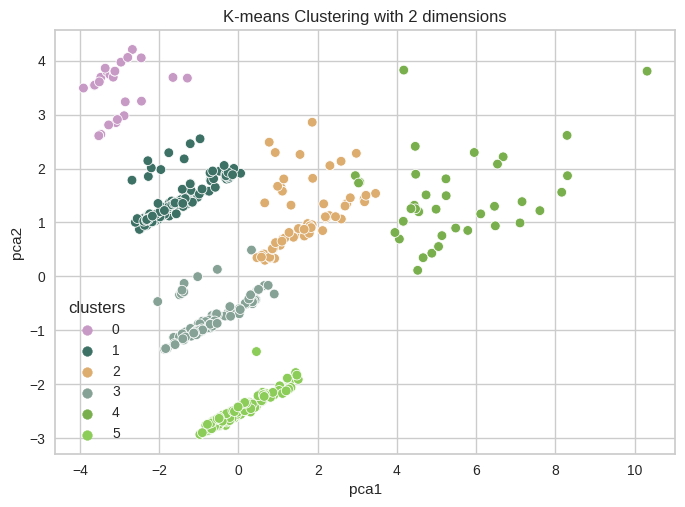

In [14]:
## Run PCA on the data and reduce the dimensions in pca_num_components dimensions
import seaborn as sns
import random as rd
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_scaled)
#here

#pca = PCA(n_components=pca_num_components)
#reduced_data = pca.fit_transform(df_scaled)
#centroids_pca = pca.transform(centroides)
# Crear DataFrame con los centroides transformados
#centroids_df = pd.DataFrame(centroids_pca, columns=['pca1', 'pca2'])


#here
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
#cluster_colors = ['red', 'blue', 'green','yellow','purple','black','pink','orange']
# Generar una lista de 10 colores aleatorios en formato hexadecimal
cluster_colors = ['#' + ''.join(rd.choices('0123456789ABCDEF', k=6)) for _ in range(6)]
sns.scatterplot(x="pca1", y="pca2", hue=df_scaled['clusters'],palette=cluster_colors, data=results)
# Graficar los centroides
#plt.scatter(centroids_df['pca1'], centroids_df['pca2'], color='brown', marker='*', s=200, label='Centroides')
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [15]:
# Calcular la inercia
inertia = clustering_kmeans.inertia_
print("Inercia:", inertia)

# Evaluar la calidad del clustering
silhouette_avg = silhouette_score(reduced_data, df_scaled['clusters'])
print("Coeficiente de Silueta promedio:", silhouette_avg)

Inercia: 2156.6912448831044
Coeficiente de Silueta promedio: 0.5742009756996256


In [16]:
# Guardar el modelo de clustering
joblib.dump(clustering_kmeans, 'kmeans_model.pkl')

# Cargar el modelo de clustering
clustering_model = joblib.load('kmeans_model.pkl')

In [17]:
# Después de realizar la clusterización y asignar los clusters
# Asumiendo que los resultados están en el dataframe "df_clusters"
df_scaled['ct_prod'] = _data['ct_prod']  # Agrega la variable producción al dataframe de clusters

# Calcula la media de producción por cluster
media_produccion = df_scaled.groupby('clusters')['ct_prod'].mean()

# Imprime los resultados
print(media_produccion)

clusters
0     2.387591
1     3.663167
2     9.009893
3     2.509640
4    19.554020
5     3.070223
Name: ct_prod, dtype: float64


In [18]:
_data.tail(5)

,Index,_1,Identificador,year,rc_clacul,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,...,pq_herb,ct_color_her_pq,pq_ins,ct_color_ins_pq,pq_fun,ct_color_fun_pq,su_plaguicidas,ct_prod,Ventas,Unnamed: 28
474,163,16815,12085151000993398,2017,507,2,4.9392,4.9392,7,2,...,7.0,3,2.0,4,0.0,0,4.9392,16.838182,16.838182,NaN
475,162,16813,12085151000993398,2017,507,2,9.8784,9.8784,7,2,...,14.0,3,4.0,3,0.0,0,9.8784,33.676364,33.676364,NaN
476,167,16821,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN
477,166,16820,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN
478,165,16819,12085152000990314,2017,507,2,5.0000,5.0000,7,2,...,0.0,0,2.0,1,9.0,1,5.0000,12.313636,12.313636,NaN


In [20]:
primer_ejemplo = _data.iloc[474]
#primer_ejemplo
data2 = primer_ejemplo[['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                       'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                       'ct_pqui', 'su_plaguicidas', 'Ventas']]
df_prueba = pd.DataFrame(data2).T
df_prueba

,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,su_fertilizada,ct_fqui,ct_fqui_npk,ct_pqui,su_plaguicidas,Ventas
474,2.0,4.9392,4.9392,7.0,2.0,4.9392,1.0,0.0,1.0,4.9392,16.838182


In [21]:
# Escalar y transformar la nueva finca

nueva_finca_scaled = scaler.transform(df_prueba)  # Donde "nueva_finca" es un array o dataframe de la nueva finca

# Asignar la nueva finca a un cluster
cluster = clustering_model.predict(nueva_finca_scaled)
print(cluster)
# Obtener la media de producción del cluster asignado a la nueva finca
#media_produccion_cluster = df_scaled.loc[df_scaled['clusters'] == cluster, 'ct_prod'].mean()
media_produccion_cluster = df_scaled.loc[df_scaled['clusters'] == cluster[0], 'ct_prod'].mean()
# Imprimir la media de producción estimada para la nueva finca
print("Media de producción estimada:", media_produccion_cluster)

[4]
Media de producción estimada: 19.554019956031045


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
